Final Coefficients: [ 10.72020979  15.63273346 -37.84668115  23.33934945  23.25768876
   0.65507588  -0.72530164   1.71431453   2.52509131   0.54916786
   0.           0.68829089   2.16745987   0.0990111    0.81360937
   2.12029531   3.11390164   6.71300296   0.14476417  -1.34156733
  -0.41817477  -0.20431761  -0.26181104   1.7831789    5.18016981
  -0.12103851  20.04167646]


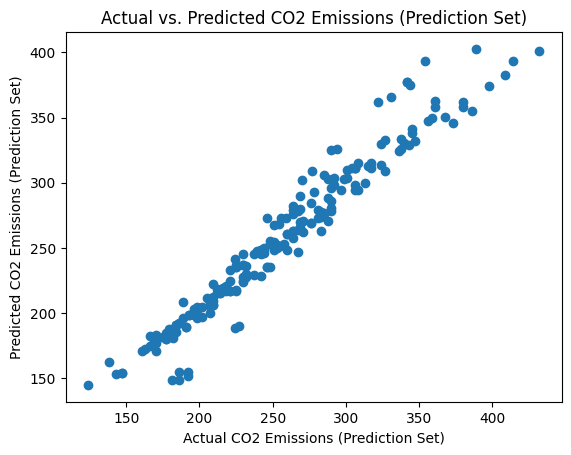

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Fuel.csv")  # Replace with the actual path to your dataset

# Select relevant columns
X = data[["ENGINESIZE", "FUELCONSUMPTION_COMB", "FUELTYPE", "TRANSMISSION"]]
y = data["CO2EMISSIONS"]

# Encode categorical features "FUELTYPE" and "TRANSMISSION" using one-hot encoding
X = pd.get_dummies(X, columns=["FUELTYPE", "TRANSMISSION"], drop_first=True)

# Add a bias term (intercept) to X
X['bias'] = 1

# Convert X and y to NumPy arrays with float data type
X = X.astype(float).values
y = y.astype(float).values

# Set a random seed for reproducibility
#np.random.seed(42)

# Define the train-test split ratio (e.g., 80% training, 20% prediction)
split_ratio = 0.8

# Randomly shuffle the data indices
num_samples = X.shape[0]
shuffled_indices = np.random.permutation(num_samples)

# Calculate the split point
split_point = int(split_ratio * num_samples)

# Split the data into training and prediction sets
X_train = X[shuffled_indices[:split_point]]
y_train = y[shuffled_indices[:split_point]]
X_pred = X[shuffled_indices[split_point:]]
y_pred = y[shuffled_indices[split_point:]]

# Define the gradient descent function
def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    coefficients = np.zeros(n)

    for _ in range(num_iterations):
        y_pred = np.dot(X, coefficients)
        error = y_pred - y
        gradient = np.dot(X.T, error) / m
        coefficients -= learning_rate * gradient

    return coefficients

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Model Training
coefficients = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Print the final coefficients
print("Final Coefficients:", coefficients)

# Making predictions
y_pred_test = np.dot(X_pred, coefficients)

# Visualizing the results
plt.scatter(y_pred, y_pred_test)
plt.xlabel("Actual CO2 Emissions (Prediction Set)")
plt.ylabel("Predicted CO2 Emissions (Prediction Set)")
plt.title("Actual vs. Predicted CO2 Emissions (Prediction Set)")
plt.show()


In [21]:

# Calculate R-squared (R²)
mean_actual = y_pred.mean()
tss = ((y_pred - mean_actual) ** 2).sum()
rss = ((y_pred - y_pred_test) ** 2).sum()
r_squared = 1 - (rss / tss)

# Print the R-squared value
print("R-squared (R²):", r_squared)

R-squared (R²): 0.9467122859490528


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Calculate R-squared for the custom model
r2_custom = r2_score(y_pred, y_pred_test)

# Scikit-learn Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with scikit-learn model
y_pred_sklearn = lr_model.predict(X_pred)

# Calculate R-squared for scikit-learn model
r2_sklearn = r2_score(y_pred, y_pred_sklearn)

# Print R-squared for both models
print("R-squared for Custom Model:", r2_custom)
print("R-squared for scikit-learn Model:", r2_sklearn)

R-squared for Custom Model: 0.9467122859490528
R-squared for scikit-learn Model: 0.9895542485760263
